# An introduction to machine learning with scikit-learn

http://scikit-learn.org/stable/tutorial/basic/tutorial.html#  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Machine learning: the problem setting

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

We can separate learning problems in a few large categories:

- supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:  
 - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.    
 - regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.  
- unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

#### Training set and testing set

Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties.

## Loading an example dataset

scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.

In the following, we start a Python interpreter from our shell and then load the iris and digits datasets. Our notational convention is that $ denotes the shell prompt while >>> denotes the Python interpreter prompt:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [7]:
digits.images[0].shape

(8, 8)

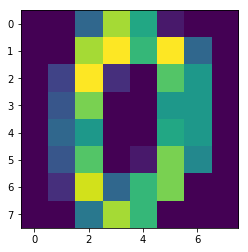

In [8]:
plt.imshow(digits.images[0]);

## Learning and predicting

In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [10]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.predict(digits.data[-1:])

array([8])

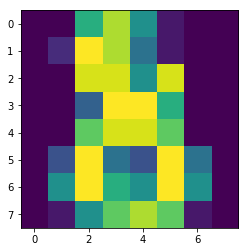

In [12]:
plt.imshow(digits.images[-1]);

## Model persistence

In [13]:
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()

clf = svm.SVC()
X, y = iris.data, iris.target
clf.fit(X, y)  

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [14]:
from sklearn.externals import joblib

joblib.dump(clf, 'filename.pkl')
clf = joblib.load('filename.pkl') 

## Conventions

#### Type casting¶
Unless otherwise specified, input will be cast to float64:

In [15]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype 

dtype('float32')

In [16]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In this example, X is float32, which is cast to float64 by fit_transform(X).

Regression targets are cast to float64, classification targets are maintained:

In [17]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [19]:
clf.fit(iris.data, iris.target_names[iris.target])  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
list(clf.predict(iris.data[:3]))  

['setosa', 'setosa', 'setosa']

Here, the first predict() returns an integer array, since iris.target (an integer array) was used in fit. The second predict() returns a string array, since iris.target_names was for fitting.

#### Refitting and updating parameters
Hyper-parameters of an estimator can be updated after it has been constructed via the sklearn.pipeline.Pipeline.set_params method. Calling fit() more than once will overwrite what was learned by any previous fit():

In [21]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [23]:
clf.set_params(kernel='rbf').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

Here, the default kernel rbf is first changed to linear after the estimator has been constructed via SVC(), and changed back to rbf to refit the estimator and to make a second prediction.

#### Multiclass vs. multilabel fitting¶

When using multiclass classifiers, the learning and prediction task that is performed is dependent on the format of the target data fit upon:  

In [25]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In the above case, the classifier is fit on a 1d array of multiclass labels and the predict() method therefore provides corresponding multiclass predictions. It is also possible to fit upon a 2d array of binary label indicators:

In [26]:
y

[0, 0, 1, 1, 2]

In [27]:
y = LabelBinarizer().fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [28]:
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

Here, the classifier is fit() on a 2d binary label representation of y, using the LabelBinarizer. In this case predict() returns a 2d array representing the corresponding multilabel predictions.

Note that the fourth and fifth instances returned all zeroes, indicating that they matched none of the three labels fit upon. With multilabel outputs, it is similarly possible for an instance to be assigned multiple labels:

In [29]:
X

[[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y

[[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]

In [31]:
y = MultiLabelBinarizer().fit_transform(y)
y

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

In [32]:
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In this case, the classifier is fit upon instances each assigned multiple labels. The MultiLabelBinarizer is used to binarize the 2d array of multilabels to fit upon. As a result, predict() returns a 2d array with multiple predicted labels for each instance.